In [2]:
#import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [3]:
path = r'C:\Users\hnguy\OneDrive\Documents\Instacart Basket Analysis'

In [5]:
#import latest data
ords_prods_custs = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_final.pkl'))

Consider any security implications that might exist for this new data. You'll need to address any PII data in the data before continuing your analysis.

The customer data set contains lots of PII data since it has the customers' personal information, such as name, address, and salary. I will leave the PII data alone since there are no instructions specified in the project brief.

# Create regional segmentation of data

The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You'll need to create a "Region" column based on the "State" column from your customers data set. 

In [6]:
ords_prods_custs['state'].head()

0    Alabama
1    Alabama
2    Alabama
3    Alabama
4    Alabama
Name: state, dtype: object

In [8]:
#creating region list
Region = []

for value in ords_prods_custs ['state']:
    if value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey':
        Region.append('North East')
    elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri':
        Region.append('Midwest')
    elif value == 'Delaware' or value == 'Maryland' or value == 'District of Columbia' or value == 'Virginia' or value == 'West Virginia' or value == 'North Carolina' or value == 'South Carolina' or value == 'Georgia' or value == 'Florida' or value == 'Kentucky' or value == 'Tennessee' or value == 'Mississippi' or value == 'Alabama' or value == 'Oklahoma' or value == 'Texas' or value == 'Arkansas' or value == 'Louisiana':
        Region.append('South')
    else:
        Region.append('West')


In [9]:
#assigning region list to column named 'region'
ords_prods_custs['region'] = Region

In [11]:
ords_prods_custs.head()

,order_id,user_id,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,no_dependants,marital status,income,region
0,2539329,1,1,2,8,NaN,False,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,True,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,True,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,True,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,True,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


In [15]:
#crosstab 'spender_flag' column and 'region' column
pd.crosstab(ords_prods_custs['spender_flag'], ords_prods_custs['region'])

region,Midwest,North East,South,West
spender_flag,,,,
High spender,155975,108225,209691,160354
Low_spender,7441350,5614511,10582194,8132559


# Creating exclusion flag for low-activity customers

The Instacart CFO isn't interested in customers who dont' generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [16]:
#create column that shows the total number of orders by user
ords_prods_custs['max_order'] = ords_prods_custs.groupby(['user_id']) ['order_number'].transform(np.sum)

In [17]:
#create flag depending how many orders the customers made
ords_prods_custs.loc[ords_prods_custs['max_order'] < 5, 'activity_flag'] = 'low_activity_customer'
ords_prods_custs.loc[ords_prods_custs['max_order'] >= 5, 'activity_flag'] = 'normal_activity_customer'

In [18]:
#create subset for customers with low activity
low_activity_custs = ords_prods_custs[ords_prods_custs['activity_flag'] == 'low_activity_customer']

In [19]:
#export data with that subset
low_activity_custs.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.pkl'))

In [20]:
#create subset for customers with high activity
ords_prods_custs_new = ords_prods_custs[ords_prods_custs['activity_flag'] == 'normal_activity_customer']

# Create profiling variables based on factors such as age and income. 

Create a profiling variable based on age, income, certain goods in the "department_id" column, and number of dependents. You might also use the "orders_day_of_the_week" and "order_hour_of_day" columns if you can think of a way they would impact customer profiles.

In [6]:
#create column called 'age_group' and categorize users based on their age
ords_prods_custs_new.loc[ords_prods_custs_new['age'] <= 35, 'age_group'] = 'Young adult'

In [7]:
ords_prods_custs_new.loc[ords_prods_custs_new['age'] >35, 'age_group'] = 'Middle-aged adult'

In [8]:
ords_prods_custs_new.loc[ords_prods_custs_new['age'] >= 60, 'age_group'] = 'Old adult'

In [9]:
#aggregate for age group usage frequency
ords_prods_custs_new.groupby('age_group').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                                    mean  min   max
age_group                                          
Middle-aged adult              11.098956  0.0  30.0
Old adult                      11.092551  0.0  30.0
Young adult                    11.124858  0.0  30.0

In [10]:
#aggregate for age group expenditure
ords_prods_custs_new.groupby('age_group').agg({'prices':['mean', 'min', 'max']})

prices              
                        mean  min      max
age_group                                 
Middle-aged adult  12.068365  1.0  99999.0
Old adult          11.763337  1.0  99999.0
Young adult        12.125184  1.0  99999.0

In [17]:
#create column 'income_group' and categorize users based on their income
ords_prods_custs_new.loc[ords_prods_custs_new['income'] <= 100000, 'income_group'] = 'low income'

In [14]:
ords_prods_custs_new.loc[ords_prods_custs_new['income'] <= 400000, 'income_group'] = 'middle income'

In [15]:
ords_prods_custs_new.loc[ords_prods_custs_new['income'] > 400000, 'income_group'] = 'high income'

In [18]:
ords_prods_custs_new['income_group'].value_counts (dropna = False)

low income       17590655
middle income    14766509
high income         47692
Name: income_group, dtype: int64

In [19]:
#aggregate for income group usage frequency
ords_prods_custs_new.groupby('income_group').agg({'days_since_prior_order' : ['mean', 'min', 'max']})

days_since_prior_order           
                                mean  min   max
income_group                                   
high income                10.424753  0.0  30.0
low income                 11.158293  0.0  30.0
middle income              11.041878  0.0  30.0

In [20]:
#aggregate for income group price frequency
ords_prods_custs_new.groupby('income_group').agg({'prices' : ['mean', 'min', 'max']})

prices              
                     mean  min      max
income_group                           
high income    227.570947  1.0  99999.0
low income       8.106621  1.0  99999.0
middle income   15.898368  1.0  99999.0

In [21]:
ords_prods_custs_new.head()

,order_id,user_id,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,state,age,date_joined,no_dependants,marital status,income,region,activity_flag,age_group,income_group
0,2539329,1,1,2,8,NaN,False,196,1,0,...,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer,Young adult,low income
1,2398795,1,2,3,7,15.0,True,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer,Young adult,low income
2,473747,1,3,3,12,21.0,True,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer,Young adult,low income
3,2254736,1,4,4,7,29.0,True,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer,Young adult,low income
4,431534,1,5,4,15,28.0,True,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer,Young adult,low income


In [33]:
#create column called 'baby_status' and categorize users based on whether they have purchased items on baby department
ords_prods_custs_new.loc[ords_prods_custs_new['department_id'] == 18, 'baby_status'] = 'yes'

In [34]:
ords_prods_custs_new.loc[(ords_prods_custs_new['department_id'] != 18), 'baby_status'] = 'no'

In [35]:
ords_prods_custs_new['baby_status'] = ords_prods_custs_new.groupby(['user_id']) ['baby_status'].transform(np.max)

In [37]:
ords_prods_custs_new['baby_status'].value_counts(dropna = False)

no     22431547
yes     9973309
Name: baby_status, dtype: int64

In [38]:
#aggregate for baby status usage frequency
ords_prods_custs_new.groupby('baby_status').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                              mean  min   max
baby_status                                  
no                       11.848431  0.0  30.0
yes                       9.479345  0.0  30.0

In [39]:
#aggregate for baby status expenditure
ords_prods_custs_new.groupby('baby_status').agg({'prices':['mean', 'min','max']})

prices              
                  mean  min      max
baby_status                         
no           12.515292  1.0  99999.0
yes          10.776779  1.0  99999.0

In [42]:
#create column called 'household_size' and categorize users based on their number of dependents
ords_prods_custs_new.loc[ords_prods_custs_new['no_dependants'] == 0, 'household_size'] = 'single household'

In [43]:
ords_prods_custs_new.loc[(ords_prods_custs_new['no_dependants'] <= 2) & (ords_prods_custs_new['no_dependants'] > 1) , 'household_size'] = 'small household'

In [44]:
ords_prods_custs_new.loc[(ords_prods_custs_new['no_dependants'] <= 3) & (ords_prods_custs_new['no_dependants'] > 2) , 'household_size'] = 'large household'

In [45]:
ords_prods_custs_new['household_size'].value_counts(dropna = False)

large household     8135109
single household    8097502
small household     8091141
NaN                 8081104
Name: household_size, dtype: int64

In [46]:
#aggregate household size usage frequency
ords_prods_custs_new.groupby('household_size').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                                   mean  min   max
household_size                                    
large household               11.109714  0.0  30.0
single household              11.080806  0.0  30.0
small household               11.125754  0.0  30.0

In [47]:
#aggregate household size price frequency
ords_prods_custs_new.groupby('household_size').agg({'prices':['mean', 'min','max']})

prices              
                       mean  min      max
household_size                           
large household   11.793264  1.0  99999.0
single household  12.129242  1.0  99999.0
small household   12.369545  1.0  99999.0

In [49]:
#crosstab orders_days_of_week and household_size
household_ords = pd.crosstab(ords_prods_custs_new['orders_days_of_week'], ords_prods_custs_new['household_size'])

In [50]:
household_ords

household_size,large household,single household,small household
orders_days_of_week,,,
0,1564100,1550309,1545873
1,1426184,1424767,1399722
2,1066795,1049128,1051708
3,962026,959353,964243
4,943931,945205,946691
5,1044235,1057145,1054316
6,1127838,1111595,1128588


In [51]:
#crosstab 'order_hour_of_day' and 'household_size'
household_ords2 = pd.crosstab(ords_prods_custs_new['order_hour_of_day'], ords_prods_custs_new['household_size'])

In [52]:
#crosstab 'loyalty_flag' and 'household_size'
loyal_household = pd.crosstab(ords_prods_custs_new['loyalty_flag'], ords_prods_custs_new['household_size'])

# Create appropriate visualizations to show distribution of profiles

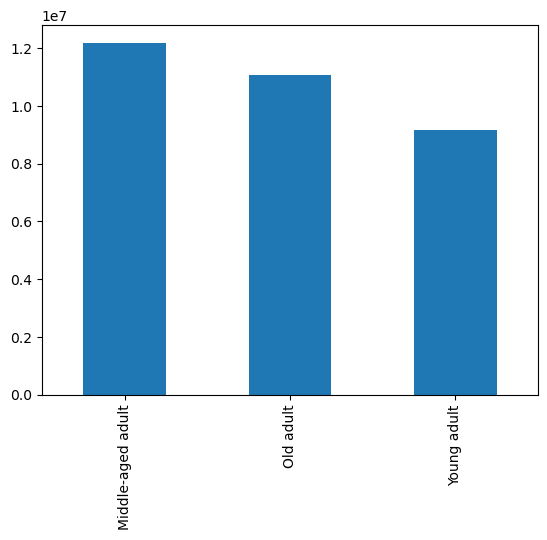

In [53]:
#create bar chart for 'age_group'
bar1 = ords_prods_custs_new ['age_group'].value_counts().plot.bar()

In [54]:
#export chart
bar1.figure.savefig(os.path.join(path, '04 Analysis', 'bar_age_group'))

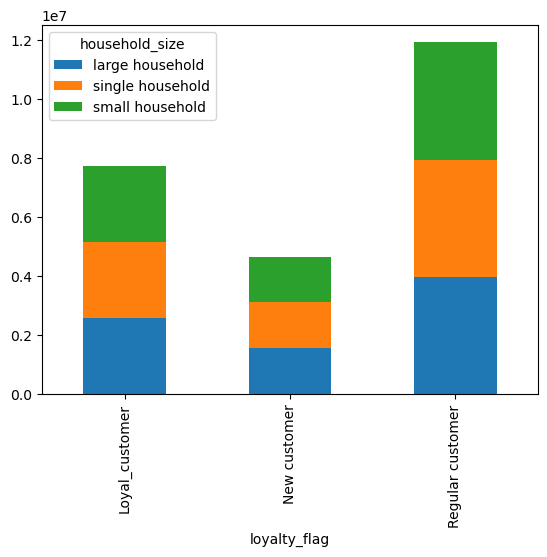

In [55]:
#create bar chart for customers based on loyalty flag and household size
bar2 = loyal_household.plot(kind = 'bar', stacked = True)

In [56]:
#export chart
bar2.figure.savefig(os.path.join(path, '04 Analysis', 'loyal_household.png'))

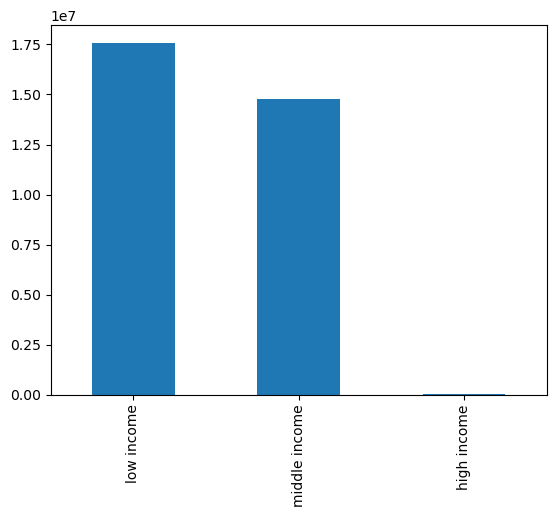

In [57]:
#create bar chart based on income group
bar3 = ords_prods_custs_new['income_group'].value_counts().plot.bar()

In [58]:
#export bar chart
bar3.figure.savefig(os.path.join(path, '04 Analysis', 'income_group.png'))

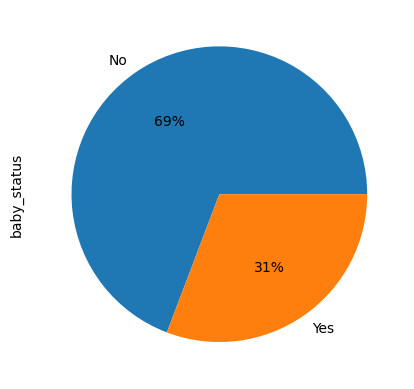

In [60]:
#create pie chart based on baby status
pie1 = ords_prods_custs_new['baby_status'].value_counts().plot.pie(labels = ['No','Yes'], autopct=('%1.f%%'))

In [61]:
#export pie chart
pie1.figure.savefig(os.path.join(path, '04 Analysis', 'baby_status.png'))

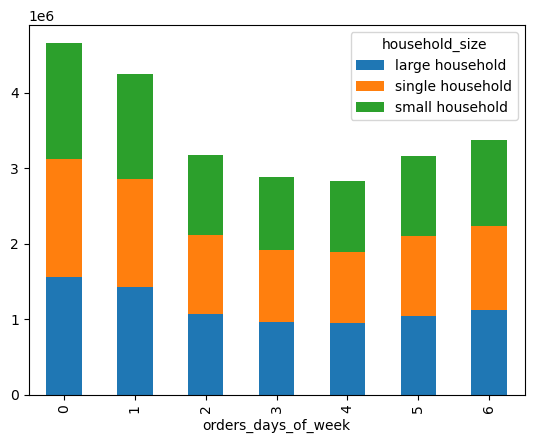

In [63]:
#create bar chart based on orders per day of week and household size
bar4 = household_ords.plot(kind= 'bar', stacked = True)

In [64]:
#export bar chart
bar4.figure.savefig(os.path.join(path, '04 Analysis', 'household_orders.png'))

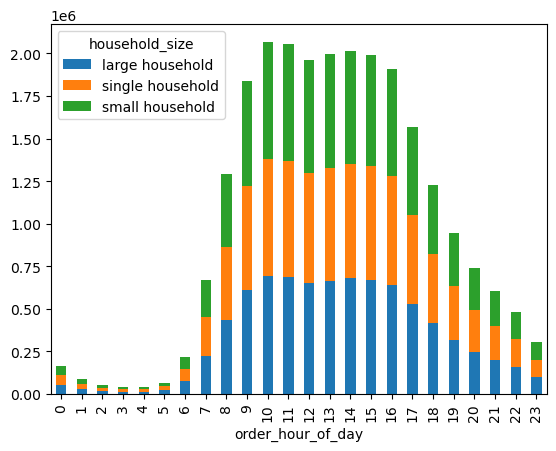

In [65]:
#create bar graph based on order_hour_of_day and household size
bar5 = household_ords2.plot(kind = 'bar', stacked = True)

In [66]:
#export bar chart
bar5.figure.savefig(os.path.join(path, '04 Analysis', 'household_orders2.png'))

# Comparing customer profiles with regions and departments

Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

Produce suitable charts to illustrate your results and export them in your project folder.

In [67]:
#crosstab income group and region
age_region = pd.crosstab(ords_prods_custs_new['income_group'], ords_prods_custs_new['region'])

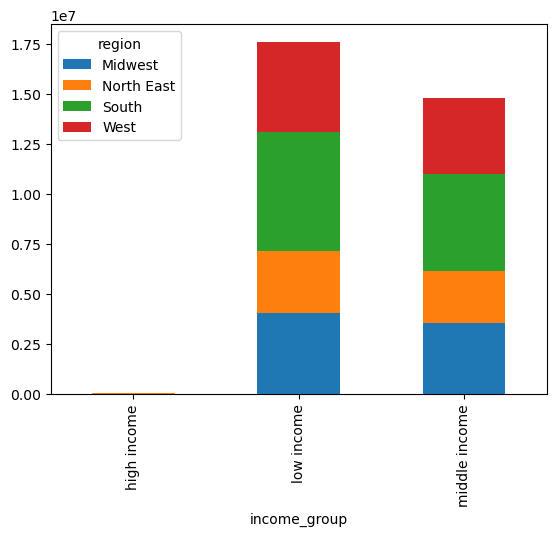

In [68]:
#create bar chart based on income group and region
bar8 = age_region.plot(kind = 'bar', stacked = True)

In [70]:
#export bar chart
bar8.figure.savefig(os.path.join(path, '04 Analysis', 'age_region.png'))

In [76]:
#import departments data
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [81]:
#renamed the unnamed column to department id
df_dept.rename(columns = {'Unnamed: 0': 'department_id'}, inplace = True)

In [83]:
#turn department data into data dictionary
zipped=zip(df_dept['department_id'], df_dept['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [86]:
#connect department names to department id
ords_prods_custs_new['department'] = ords_prods_custs_new['department_id'].map(data_dict)

In [87]:
#crosstab department to region
region_dept = pd.crosstab(ords_prods_custs_new['department'], ords_prods_custs_new['region'])

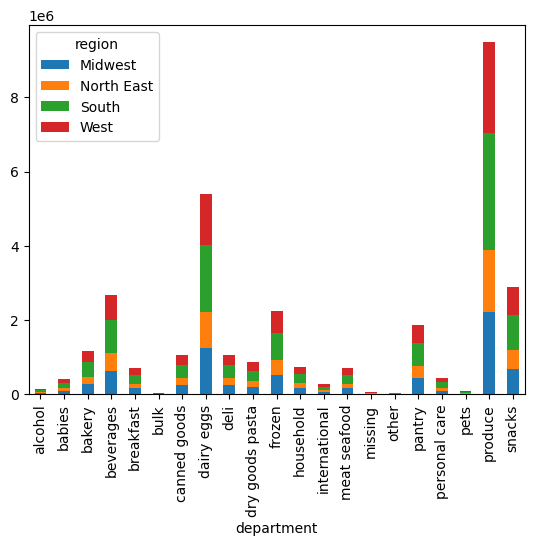

In [89]:
#create bar chart based on department and region
bar9 = region_dept.plot(kind = 'bar', stacked = True)

In [90]:
#export bar graph
bar9.figure.savefig(os.path.join(path, '04 Analysis', 'region_dept.png'))

In [92]:
#crosstab household_size and region
householdsize_reg = pd.crosstab(ords_prods_custs_new['household_size'], ords_prods_custs_new['region'])

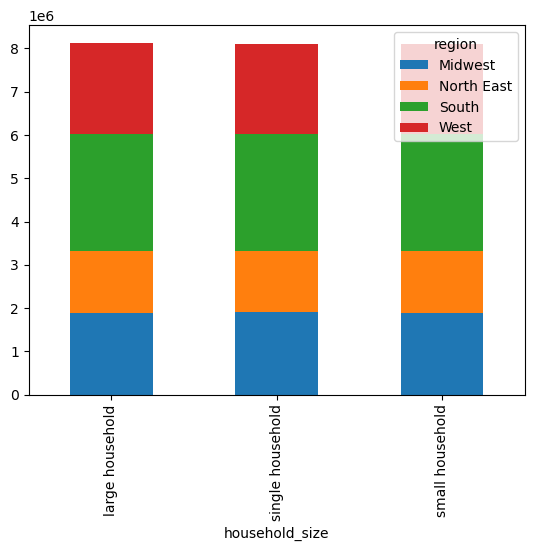

In [94]:
#create bar chart based on household size and region
bar10 = householdsize_reg.plot(kind = 'bar', stacked = True)

In [95]:
#export bar chart 
bar10.figure.savefig(os.path.join(path, '04 Analysis', 'householdsize_reg.png'))

In [96]:
#crosstab department and household size
householdsize_dept = pd.crosstab(ords_prods_custs_new['department'], ords_prods_custs_new['household_size'])

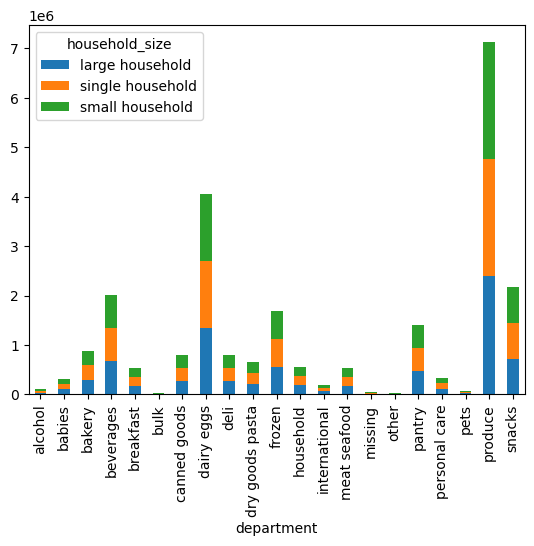

In [97]:
#create bar chart based on department and household size
bar11 = householdsize_dept.plot(kind = 'bar', stacked = True)

In [98]:
#create bar chart
bar11.figure.savefig(os.path.join(path, '04 Analysis', 'householdsize_dept.png'))

In [99]:
#export final data
ords_prods_custs_new.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custs_final.pkl'))